<h2 align=center> Smile detection with Keras</h2>

### 1: Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils
import os
import random
from sklearn.model_selection import train_test_split
from PIL import Image as PImage
%matplotlib inline

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0


### 2: Load and plot sample images

In [4]:
images_train = []
labels_train = []
count = 0
for filename in os.listdir('training/non-smile'):
    if count==7200:
        break
    count +=1
    input_image = cv2.imread('training/non-smile/' + filename)
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    imgdata = np.array(gray)
    images_train.append(imgdata)
    labels_train.append([0,1])
for filename in os.listdir('training/smile'):
    input_image = cv2.imread('training/smile/' + filename)
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    imgdata = np.array(gray)
    images_train.append(imgdata)
    labels_train.append([1,0])
#images_train = np.asarray(images_train)
#labels_train = np.asarray(labels_train)

In [23]:
images_test = []
labels_test = []
for filename in os.listdir('testing/non-smile'):
    input_image = cv2.imread('testing/non-smile/' + filename)
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    imgdata = np.array(gray)
    images_test.append(imgdata)
    labels_test.append(0)
for filename in os.listdir('testing/smile'):
    input_image = cv2.imread('testing/smile/' + filename)
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    imgdata = np.array(gray)
    images_test.append(imgdata)
    labels_test.append(1)
#X_test = np.asarray(images_test)
#y_test = np.asarray(labels_test)

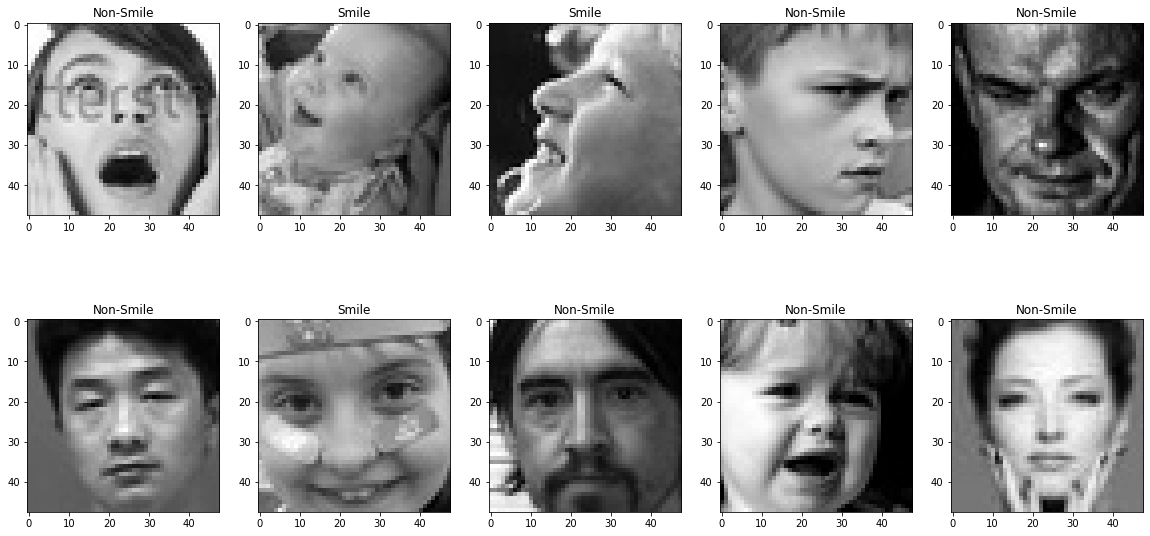

In [8]:
fig=plt.figure(figsize=(20,20))
nrows = 2
ncols = 5
for i in range (1, nrows*ncols+1):
    index = np.random.randint(0, len(images_train))
    img = images_train[index]
    title = 'Smile' if labels_train[index][0]==1 else 'Non-Smile'
    if i < 6:
        fig.add_subplot(1,ncols,i)
    else:
        fig.add_subplot(2,ncols,i)
    plt.imshow(img, cmap='gray')
    plt.title(title)

plt.show()


In [45]:
print('Non-Quan images: ' + str(len(non_quan_images_raw)))
print('Quan images: ' + str(len(quan_images)))

Non-Quan images: 35838
Quan images: 1888


### 3: Split training and validation sets

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(images_train, labels_train, test_size=0.1, random_state=1)

In [7]:
X_train = np.asarray(X_train)
X_train = np.expand_dims(X_train, axis=0)
X_train = X_train.reshape(X_train.shape[1],X_train.shape[2],X_train.shape[3],X_train.shape[0])
y_train = np.asarray(y_train)

X_validation = np.asarray(X_validation)
X_validation = np.expand_dims(X_validation, axis=0)
X_validation = X_validation.reshape(X_validation.shape[1],X_validation.shape[2],X_validation.shape[3],X_validation.shape[0])
y_validation = np.asarray(y_validation)

### 4: Create CNN Model

In [9]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
#model.add(Conv2D(512,(3,3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# 4th Convolution layer
#model.add(Conv2D(512,(3,3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
##model.add(Dense(512))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dropout(0.50))

model.add(Dense(2, activation='softmax'))

def mse(y_true,y_pred):
    loss = K.square(y_pred - y_true)
    loss = loss * [20,0.1]
    loss = K.sum(loss, axis=1)
    return loss

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### 6: Train and Evaluate Model

In [10]:
%%time

epochs = 2


history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data = (X_validation,y_validation)
    #validation_split=0.1

)

Epoch 1/2
406/406 [==============================] - 114s 281ms/step - loss: 0.6327 - accuracy: 0.6878 - val_loss: 0.5031 - val_accuracy: 0.7552
Epoch 2/2
406/406 [==============================] - 115s 283ms/step - loss: 0.4899 - accuracy: 0.7616 - val_loss: 0.4499 - val_accuracy: 0.7850
Wall time: 3min 50s


In [24]:
X_test = np.asarray(images_test)
X_test = np.expand_dims(X_test, axis=0)
X_test = X_test.reshape(X_test.shape[1],X_test.shape[2],X_test.shape[3],X_test.shape[0])
y_test = np.asarray(labels_test)

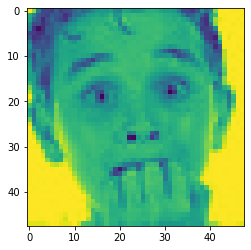

In [44]:
sample_images = X_test[52].reshape(48,48)
plt.imshow(sample_images)

In [37]:
result = model.predict(X_test)


array([0.4042133, 0.5957867], dtype=float32)

In [45]:
np.argmax(result[52])

1

In [25]:
result_sum=0
for result in model.predict(X_test):
    result_sum += np.argmax(result)


In [31]:
sum(labels_test)
result_sum

4737

### 7: Export model and its weight

In [28]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
model.save('model_weights.h5')

In [2]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wr8_9ETBbSA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Direct Youtube link (incase Github cannot render): https://www.youtube.com/watch?v=wr8_9ETBbSA